In [1]:
import os
from kid_readout.utils import readoutnc
from kid_readout.analysis import noise_measurement
plt.rcParams['font.size'] = 11
import utilities

updated file list


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
data_directory = '/data/readout'
resonator_index = 13  # This should be the 164 MHz resonance, aka channel 8

In [3]:
cw_ncs = ['2015-05-19_101902_mmw_continuous-wave_148_GHz.nc',  # 9.0
          '2015-05-19_105620_mmw_continuous-wave_148_GHz.nc',  # 8.5
          '2015-05-19_112410_mmw_continuous-wave_148_GHz.nc',  # 8.0
          '2015-05-19_115733_mmw_continuous-wave_148_GHz.nc',  # 7.5
          '2015-05-19_125442_mmw_continuous-wave_148_GHz.nc',  # 7.0
          '2015-05-19_132234_mmw_continuous-wave_148_GHz.nc',  # 6.5
          '2015-05-19_161340_mmw_continuous-wave_148_GHz.nc',  # 6.0
          '2015-05-19_171426_mmw_continuous-wave_148_GHz.nc',  # 5.5
          '2015-05-19_191152_mmw_continuous-wave_148_GHz.nc',  # 5.0
          '2015-05-19_231919_mmw_continuous-wave_148_GHz.nc',  # 4.5
          '2015-05-20_090542_mmw_continuous-wave_148_GHz.nc',  # 4.0
          '2015-05-20_100424_mmw_continuous-wave_148_GHz.nc',  # 3.5
          '2015-05-20_105213_mmw_continuous-wave_148_GHz.nc',  # 3.0
          ]

bb_ncs = ['2015-05-12_113832_mmw_noise_broadband.nc',  # 9.0
          '2015-05-12_120435_mmw_noise_broadband.nc',  # 8.5
          '2015-05-12_123322_mmw_noise_broadband.nc',  # 8.0
          '2015-05-12_133122_mmw_noise_broadband.nc',  # 7.5
          '2015-05-12_140235_mmw_noise_broadband.nc',  # 7.0
          '2015-05-12_192735_mmw_noise_broadband.nc',  # 6.5
          '2015-05-12_195908_mmw_noise_broadband.nc',  # 6.0
          '2015-05-12_203101_mmw_noise_broadband.nc',  # 5.5
          '2015-05-13_102207_mmw_noise_broadband.nc',  # 5.0
          '2015-05-13_113833_mmw_noise_broadband.nc',  # 4.5
          '2015-05-13_123152_mmw_noise_broadband.nc',  # 4.0
          '2015-05-13_151154_mmw_noise_broadband.nc',  # 3.5
          '2015-05-13_154402_mmw_noise_broadband.nc',  # 3.0
          ]

In [4]:
save_directory = '../Max/2015-12-17_log-binned'

# Orient

In [5]:
cw_nc_a29_tt7 = readoutnc.ReadoutNetCDF(os.path.join(data_directory, cw_ncs[11]))

In [6]:
len(cw_nc_a29_tt7.sweeps)

10

In [7]:
len(cw_nc_a29_tt7.timestreams)

10

The sweep/stream pairs consist of  
0 41 coarse off / short modulated on coarse  
1 41 fine off / long modulated off  
2 41 coarse on / short modulated on coarse  
3 41 fine on / long on  
4 38 fine on / long on  
5 35 fine on / long on  
6 32 fine on / long on  
7 29 fine on / long on  
8 26 fine on / long on  
9 23 fine on / long on

In [8]:
# The sweep/timestream index for attenuation 29.
index_a29 = 7

I think there are several measurements of the hardware state per timestream, one per log_hw_state() call.

In [9]:
cw_nc_a29_tt7.dac_atten

array([ 41.,  41.,  41.,  41.,  41.,  41.,  41.,  41.,  38.,  38.,  35.,
        35.,  32.,  32.,  29.,  29.,  26.,  26.,  23.,  23.], dtype=float32)

In [10]:
cw_nc_a29_tt7.close()

# Calculate PSD chunk size for 32 degrees of freedom

This length is calculated below.

In [11]:
pca_NFFT = 2**15

This is the highest optical power data that passes cuts:

In [12]:
cw_snm_a29_tt07 = noise_measurement.SweepNoiseMeasurement(cw_ncs[11],
                                                          sweep_group_index=index_a29,
                                                          timestream_group_index=index_a29,
                                                          resonator_index=resonator_index,
                                                          pca_NFFT=pca_NFFT,
                                                          pca_detrend=mlab.detrend_none,
                                                          pca_use_log_bins=False
                                                         )

/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:183: ComplexWarning: Casting complex values to real discards the imaginary part
  Pxx[:, i] = np.conjugate(fx[:numFreqs]) * fx[:numFreqs]
/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  Pyy[:, i] = np.conjugate(fy[:numFreqs]) * fy[:numFreqs]
/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:92: ComplexWarning: Casting complex values to real discards the imaginary part
  S[0, k] = ss[0, 0]
/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:93: ComplexWarning: Casting complex values to real discards the imaginary part
  S[1, k] = ss[1, 1]


In [13]:
cw_snm_a29_tt07.atten

29.0

The length of the data stream in seconds is

In [14]:
cw_snm_a29_tt07.fractional_fluctuation_timeseries.size / cw_snm_a29_tt07.timeseries_sample_rate

33.554431999999998

In [15]:
cw_snm_a29_tt07.fractional_fluctuation_timeseries.dtype

dtype('complex64')

The "fractional fluctuation" timeseries contains both phase and amplitude data. Each of these has length

In [16]:
np.log2(cw_snm_a29_tt07.fractional_fluctuation_timeseries.size)

19.0

To calculate the PSD, they are split into chunks each containing NFFT complex samples:

In [17]:
np.log2(pca_NFFT)

15.0

Negative frequency bins contain the conjugates of the values in the corresponding positive frequency bins. Taking the norm of the value in each bin produces a chi-squared distribution with two degrees of freedom. Transforming the double-sided spectra into single-sided spectra simply multiplies the real value in each positive frequency bin by two, with no effect on the number of degrees of freedom.

The single-sided spectra have length $2^{15 - 1}$ and the value in each bin is chi-square distributed with two degrees of freedom. To obtain 32 degrees of freedom, we average $16 = 2^{19 - 15}$ spectra.

In [18]:
cw_snm_a29_tt07.fractional_fluctuation_timeseries.size / cw_snm_a29_tt07.pca_freq[1:].size

32.0

This is the lowest-power data:

In [19]:
cw_snm_a29_tt17 = noise_measurement.SweepNoiseMeasurement(cw_ncs[1],
                                                          sweep_group_index=index_a29,
                                                          timestream_group_index=index_a29,
                                                          resonator_index=resonator_index,
                                                          pca_NFFT=pca_NFFT,
                                                          pca_detrend=mlab.detrend_none,
                                                          pca_use_log_bins=False
                                                         )

Create log-binned data:

In [20]:
n_bins = 100

In [21]:
bx07, Sx07, cx07 = utilities.snm_log_bin(cw_snm_a29_tt07, n_bins, eigvals=1)
bi07, Si07, ci07 = utilities.snm_log_bin(cw_snm_a29_tt07, n_bins, eigvals=0)
bc07 = bx07[:-1] + np.diff(bx07) / 2

In [22]:
bx17, Sx17, cx17 = utilities.snm_log_bin(cw_snm_a29_tt17, n_bins, eigvals=1)
bi17, Si17, ci17 = utilities.snm_log_bin(cw_snm_a29_tt17, n_bins, eigvals=0)
bc17 = bx17[:-1] + np.diff(bx17) / 2

In [23]:
df = cw_snm_a29_tt07.pca_freq[1] - cw_snm_a29_tt07.pca_freq[0]
df

0.476837158203125

In [24]:
bx17[-1]

7812.7384185791016

In [25]:
cw_snm_a29_tt07.pca_freq[-1]

7812.5

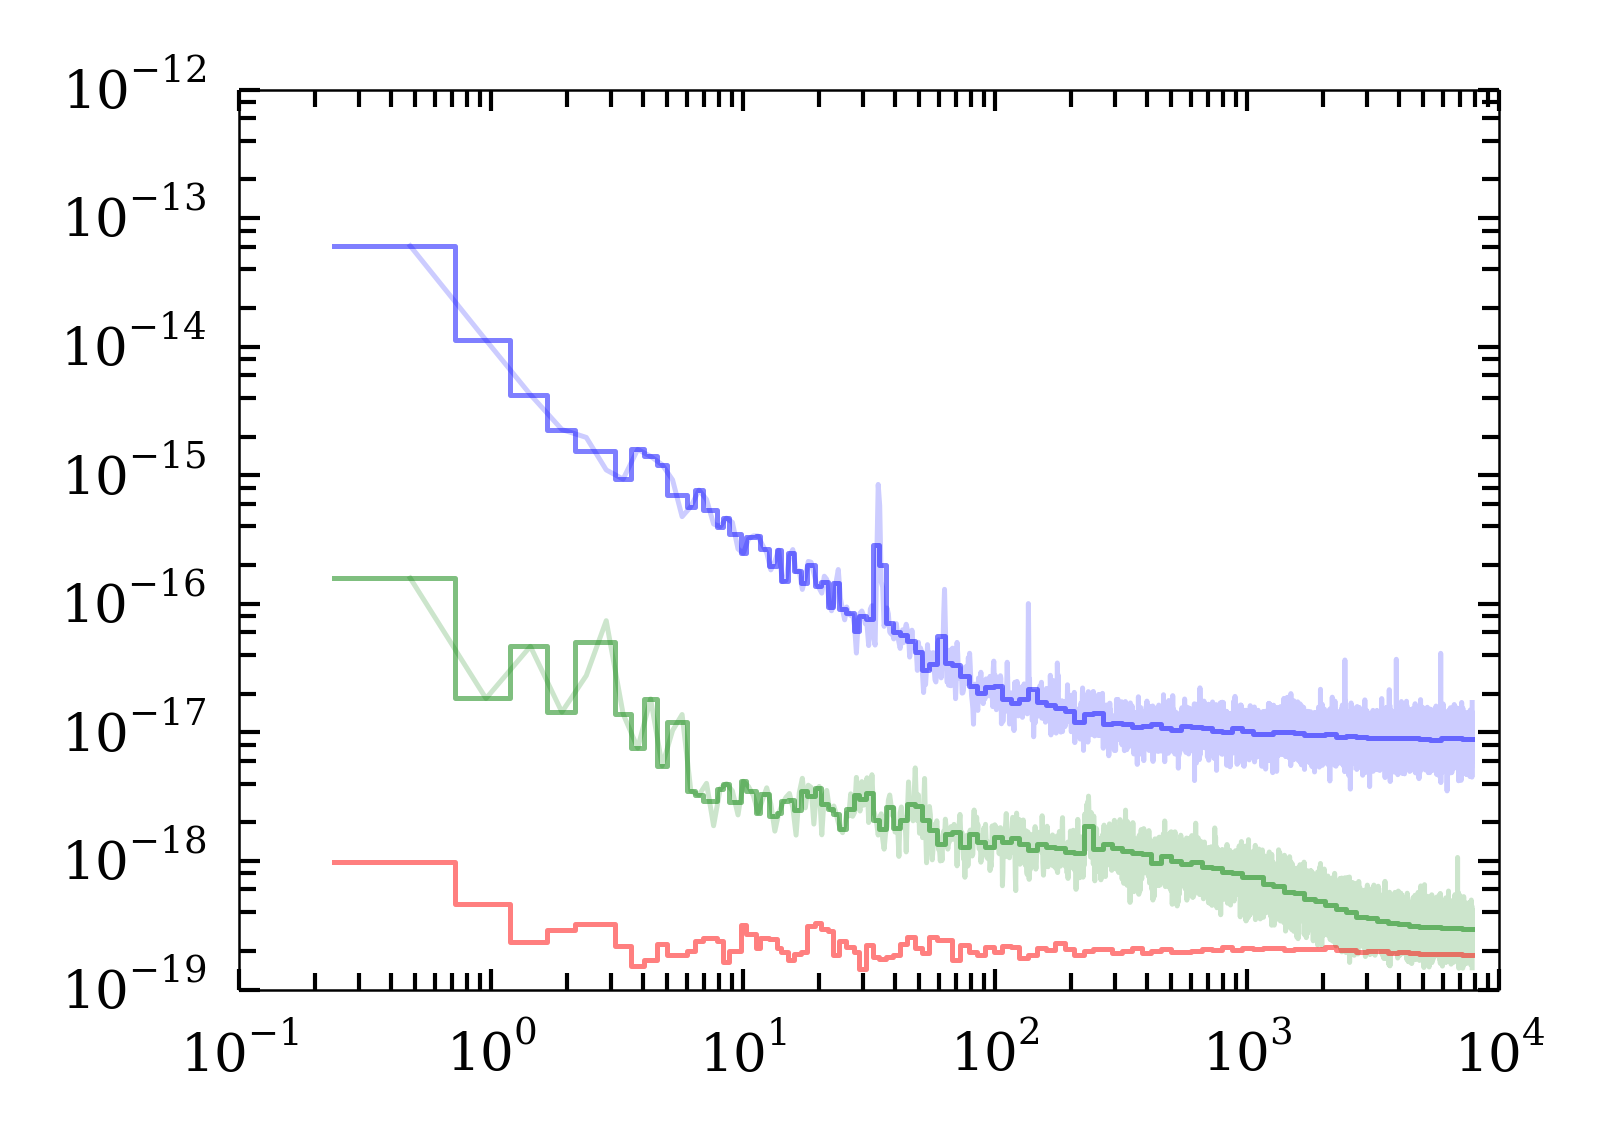

In [26]:
fig, ax = plt.subplots()

ax.loglog(cw_snm_a29_tt17.pca_freq[1:], cw_snm_a29_tt17.pca_eigvals[1][1:], '-g', alpha=0.2)
#ax.loglog(bc17, Sx17, '-', color='green', alpha=1)
utilities.histogram(ax, bx17, Sx17, color='green', alpha=0.5)
utilities.histogram(ax, bi17, Si17, color='red', alpha=0.5)


ax.loglog(cw_snm_a29_tt07.pca_freq, cw_snm_a29_tt07.pca_eigvals[1], '-b', alpha=0.2)
#ax.loglog(bc07, Sx07, '-', color='blue', alpha=0.5)
utilities.histogram(ax, bx07, Sx07, color='blue', alpha=0.5);

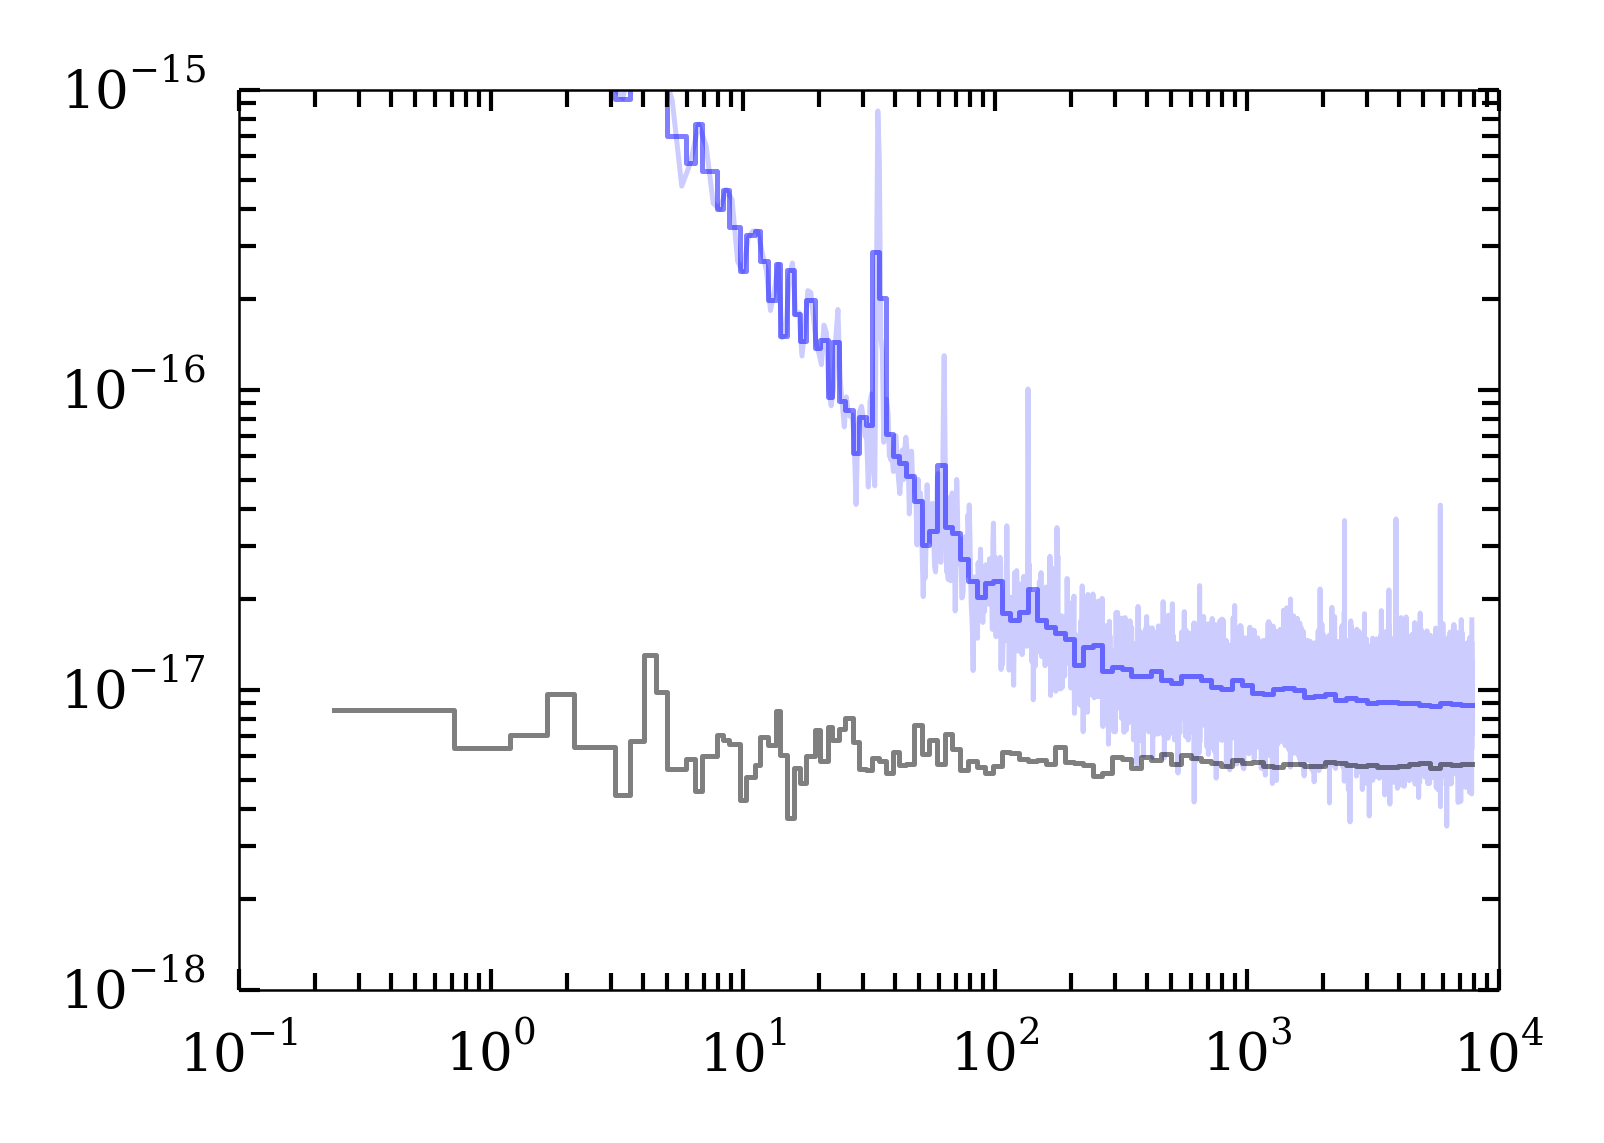

In [27]:
fig, ax = plt.subplots()

ax.plot(cw_snm_a29_tt07.pca_freq,
        cw_snm_a29_tt07.pca_eigvals[1],
        '-b', alpha=0.2)
utilities.histogram(ax, bx07, Sx07, color='blue', alpha=0.5)
utilities.histogram(ax, bi07, Si07, color='black', alpha=0.5)
#histogram(ax, bins07, Sx07 - cw_snm_a29_tt07.pca_eigvals[0][-1000:].mean(), color='blue', alpha=0.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-18, 1e-15);

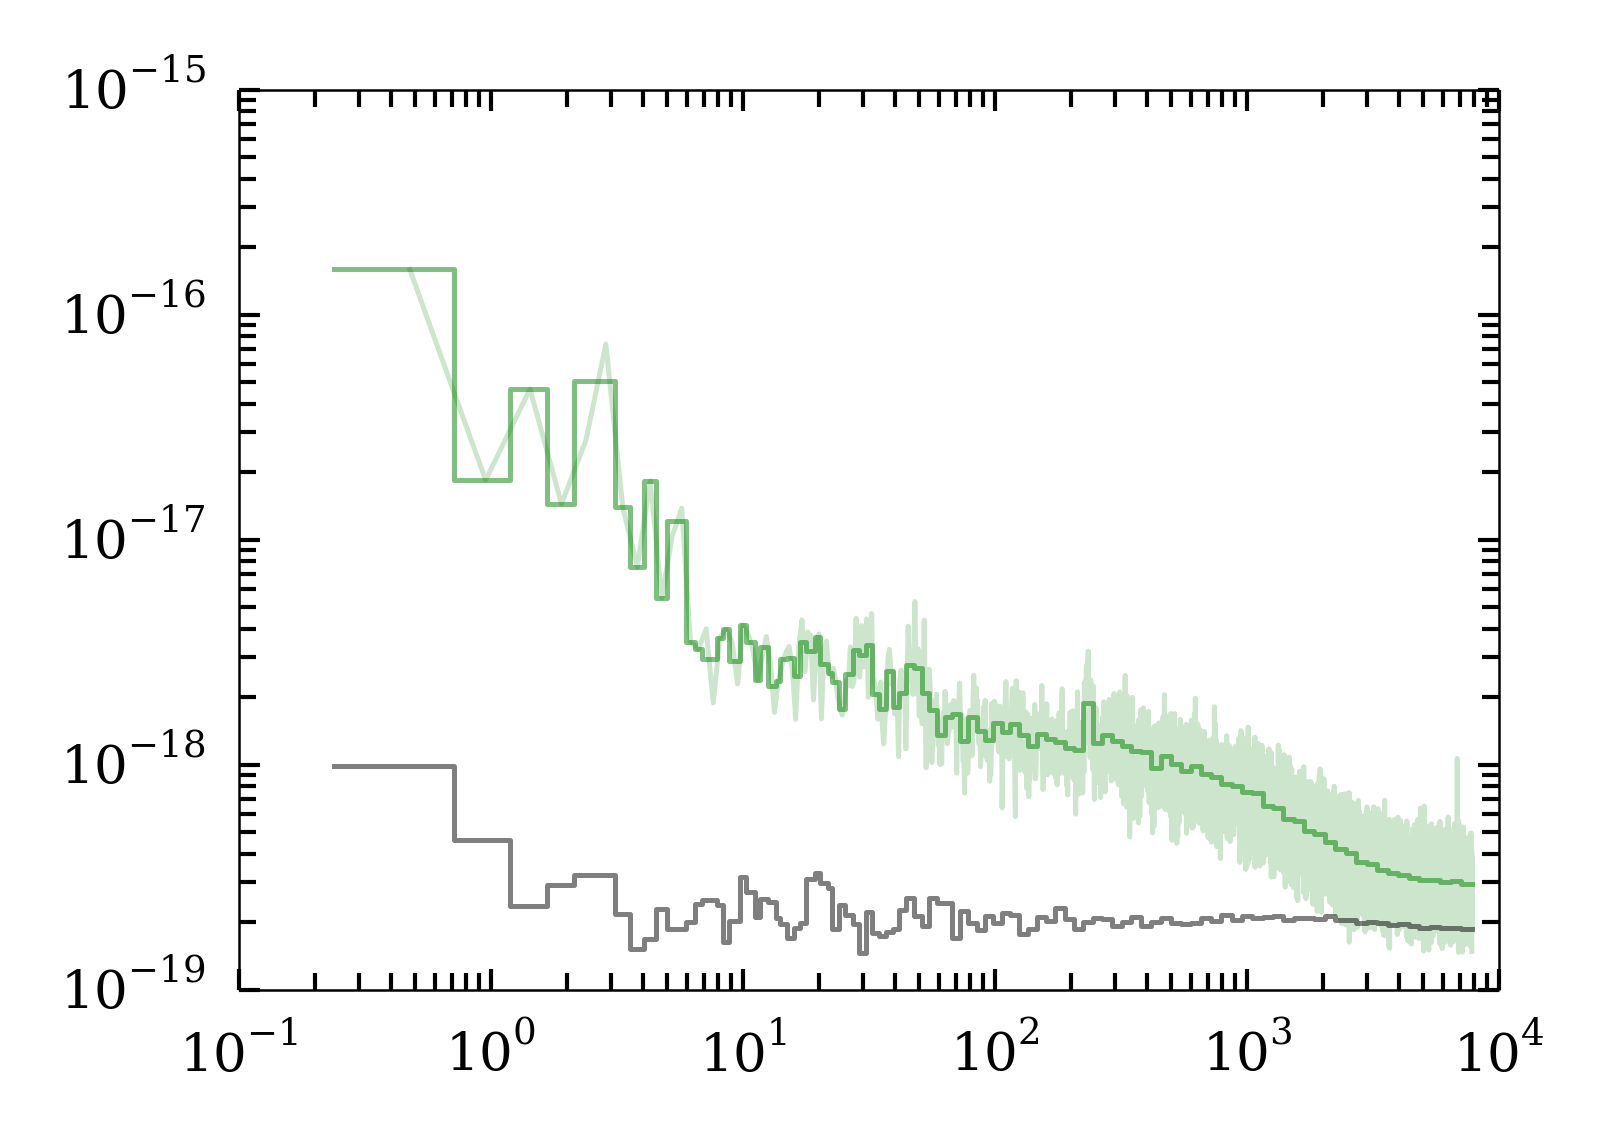

In [28]:
fig, ax = plt.subplots()

ax.plot(cw_snm_a29_tt17.pca_freq,
        cw_snm_a29_tt17.pca_eigvals[1],
        '-g', alpha=0.2)
utilities.histogram(ax, bx17, Sx17, color='green', alpha=0.5)
utilities.histogram(ax, bi17, Si17, color='black', alpha=0.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-19, 1e-15);

In [29]:
cw_snm_a29_tt07._close_files()
del(cw_snm_a29_tt07)
cw_snm_a29_tt17._close_files()
del(cw_snm_a29_tt17)

# Despiking broadband data

In [88]:
bb_snm_a29_tt06 = noise_measurement.SweepNoiseMeasurement(bb_ncs[-1],
                                                          sweep_group_index=index_a29,
                                                          timestream_group_index=index_a29,
                                                          resonator_index=resonator_index,
                                                          pca_NFFT=pca_NFFT,
                                                          pca_detrend=mlab.detrend_none,
                                                          pca_use_log_bins=False
                                                         )

In [89]:
n_bins = 200

In [90]:
bb_bx06, bb_Sx06, bb_cx06 = utilities.snm_log_bin(bb_snm_a29_tt06, n_bins)
bb_bc06 = bb_bx06[:-1] + np.diff(bb_bx06) / 2

In [91]:
n_masked = 4
f_mask = 100
bb_highest = ((bb_bc06 <= f_mask).sum() +
              bb_Sx06[bb_bc06 > f_mask].argsort())[-n_masked:]

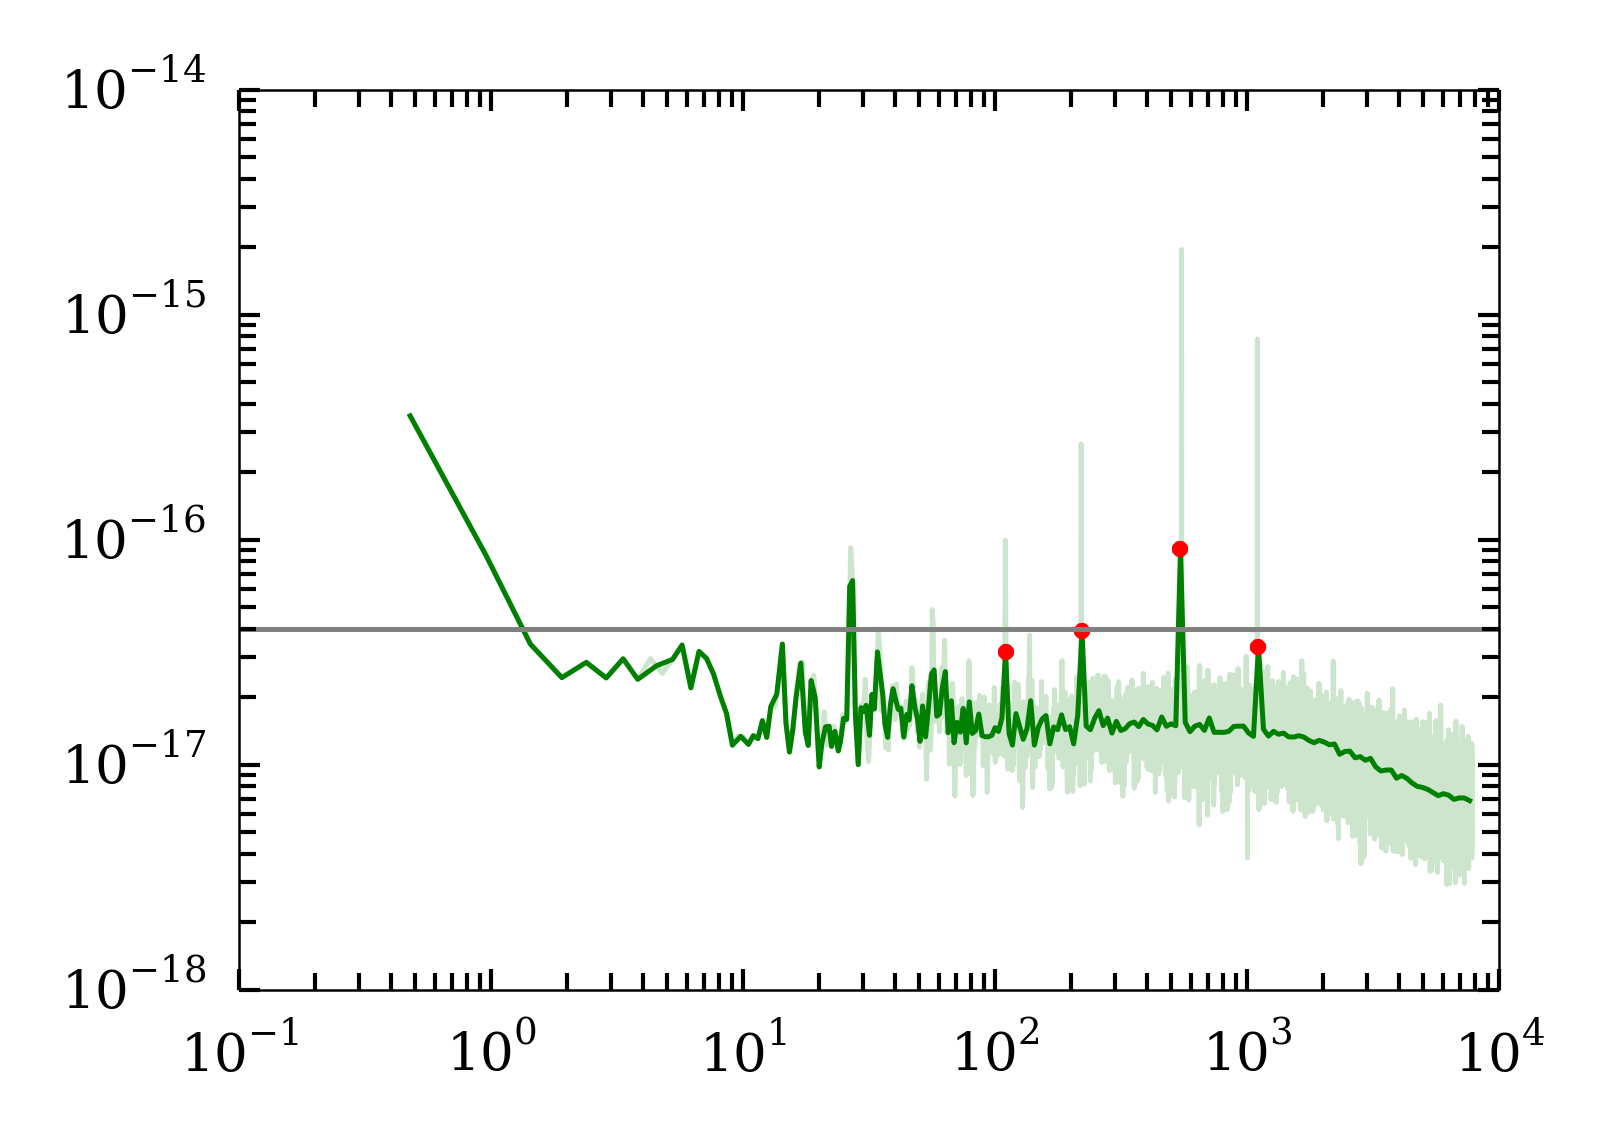

In [92]:
fig, ax = plt.subplots()

ax.loglog(bb_snm_a29_tt06.pca_freq[1:], bb_snm_a29_tt06.pca_eigvals[1][1:], '-g', alpha=0.2)
ax.loglog(bb_bc06, bb_Sx06, color='green', alpha=1)
ax.loglog(bb_bc06[bb_highest], bb_Sx06[bb_highest], '.r')
ax.axhline(4e-17, color='gray')
#ax.set_ylim(3e-18, 3e-17)
#ax.loglog(cw_snm_a29_tt6.pca_freq, cw_snm_a29_tt6.pca_eigvals[0], '-')

In [93]:
bb_bc06[sorted(bb_highest)]

array([  109.91096497,   221.01402283,   543.59436035,  1108.40797424])

In [94]:
np.diff(sorted(bb_highest))

array([20, 22, 16])

In [95]:
bb_snm_a29_tt06._close_files()
del(bb_snm_a29_tt06)

# Create all SNMs and save data

In [96]:
bb_data = {}

# Exclude 2 * 9 turns and 2 * 8.5 turns
for bb_nc in bb_ncs[2:]:
    snm = noise_measurement.SweepNoiseMeasurement(bb_nc,
                                                  sweep_group_index=index_a29,
                                                  timestream_group_index=index_a29,
                                                  resonator_index=resonator_index,
                                                  pca_NFFT=pca_NFFT,
                                                  pca_detrend=mlab.detrend_none,
                                                  pca_use_log_bins=False)
    total_turns = sum(snm.mmw_atten_turns)
    print("Turns: {}".format(total_turns))
    bin_edges, binned_dev, counts = utilities.snm_log_bin(snm, n_bins, eigvals=1)
    bin_edges, binned_amp, counts = utilities.snm_log_bin(snm, n_bins, eigvals=0)
    bb_data['{:02.0f}_dev'.format(total_turns)] = binned_dev
    bb_data['{:02.0f}_amp'.format(total_turns)] = binned_amp

bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
bb_data['f'] = bin_centers
bb_data['counts'] = counts
bb_data['highest'] = bb_highest

with open(os.path.join(save_directory, 'bb_log-binned_2015-12-17.npz'), 'w') as f:
    np.savez(f, **bb_data)

Turns: 16.0
Turns: 15.0
Turns: 14.0
Turns: 13.0
Turns: 12.0
Turns: 11.0
Turns: 10.0
Turns: 9.0
Turns: 8.0
Turns: 7.0
Turns: 6.0


In [106]:
cw_data = {}

# Exclude 2 * 9 turns and 2 * 3 turns
for cw_nc in cw_ncs[1:-1]:
    snm = noise_measurement.SweepNoiseMeasurement(cw_nc,
                                                  sweep_group_index=index_a29,
                                                  timestream_group_index=index_a29,
                                                  resonator_index=resonator_index,
                                                  pca_NFFT=pca_NFFT,
                                                  pca_detrend=mlab.detrend_none,
                                                  pca_use_log_bins=False)
    total_turns = sum(snm.mmw_atten_turns)
    print("Turns: {}".format(total_turns))
    bin_edges, binned_dev, counts = utilities.snm_log_bin(snm, n_bins, eigvals=1)
    bin_edges, binned_amp, counts = utilities.snm_log_bin(snm, n_bins, eigvals=0)
    cw_data['{:02.0f}_dev'.format(total_turns)] = binned_dev
    cw_data['{:02.0f}_amp'.format(total_turns)] = binned_amp

bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
cw_data['f'] = bin_centers
cw_data['counts'] = counts

with open(os.path.join(save_directory, 'cw_log-binned_2015-12-17.npz'), 'w') as f:
    np.savez(f, **cw_data)

Turns: 17.0
Turns: 16.0
Turns: 15.0
Turns: 14.0
Turns: 13.0
Turns: 12.0
Turns: 11.0
Turns: 10.0
Turns: 9.0
Turns: 8.0
Turns: 7.0
